# Analisis Abusive and Hate Speech di Twitter: Perspektif Bahasa Indonesia

### Table of Content

1. Background
2. Problem Identification
3. Goals
4. Data Source
5. Import Libraries
6. Reading Data
7. Statistical Information about the Data
8. Data Cleansing
9. Exploratory Data Analyst (EDA)

### 1. Background

Di era digital dan perkembangan media sosial, Twitter (X) merupakan salah satu wadah untuk saling berbagi pikiran dan opini publik secara bebas yang mempengaruhi sikap masyarakat terhadap berbagai isu politik, sosial maupun budaya. Namun, di balik kebebasan berekspresi ini, kita juga menyaksikan dampak negatif yang dihasilkan, terutama dalam bentuk ujaran kebencian dan penggunaan kata kasar. Fenomena ini tidak hanya menimbulkan kekhawatiran tentang etika dan moralitas komunikasi online, tetapi juga menimbulkan risiko serius bagi keamanan online dan kesejahteraan psikologis individu.

Dalam konteks Indonesia yang kaya akan keberagaman budaya, agama, dan suku, penggunaan Twitter sering kali memunculkan pertentangan dan perselisihan antar individu atau kelompok. Oleh karena itu, analisis mendalam terhadap bahasa kasar dan ujaran kebencian di Twitter Bahasa Indonesia sangat penting sebagai langkah preventif dalam mencegah konflik sosial dan menciptakan lingkungan online yang lebih aman dan beradab. Dengan memahami pola perilaku pengguna dan akar masalahnya, strategi dan solusi efektif dapat dikembangkan untuk menghadapi tantangan ini.

### 2. Problem Identification

- Berapa jumlah perbandingan kata yang tidak mengandung hate speech (HS) dan non-abusive dengan yang mengandung abusive dan mengandung hate speech?
- Berapa perbandingan antara jumlah tweet yang mengandung kata-kata yang diklasifikasikan sebagai "Hate Speech" (HS) dengan "Abusive" di Twitter Bahasa Indonesia?
- Bagaimana perbandingan antara jumlah kasus ujaran kebencian yang ditujukan kepada individu (HS_Individual) dengan yang ditargetkan pada suatu grup (HS_Group) di Twitter Bahasa Indonesia?
- Apa saja kata-kata kasar yang sering muncul di tweet yang terkait dengan ujaran kebencian di platform Twitter Bahasa Indonesia?"
- Berapa jumlah tweet di Twitter Bahasa Indonesia yang memiliki panjang karakter dan panjang kata yang tidak mengandung kata alay?

### 3. Goals

- Mengidentifikasi perbandingan antara jumlah tweet yang mengandung kata-kata ujaran kebencian dengan yang tidak mengandungnya secara signifikan, untuk memahami seberapa prevalen ujaran kebencian dalam konten Twitter Bahasa Indonesia.
- Menghitung dan membandingkan jumlah tweet yang diklasifikasikan sebagai "Hate Speech" (HS) dengan yang diklasifikasikan sebagai "Abusive" untuk memahami proporsi relatif dari masing-masing jenis di Twitter Bahasa Indonesia.
- Menentukan perbandingan antara jumlah kasus ujaran kebencian yang ditujukan kepada individu (HS_Individual) dengan yang ditargetkan pada suatu grup (HS_Group) dalam periode waktu tertentu untuk mengidentifikasi preferensi atau tren tertentu dalam perilaku ujaran kebencian.
- Mengidentifikasi kata-kata yang paling sering digunakan dalam konteks ujaran kebencian untuk memahami pola dan tren dalam bahasa yang digunakan untuk menyebarkan kebencian di platform Twitter bahasa Indonesia.
- Menganalisis distribusi panjang karakter dan panjang kata dalam tweet Bahasa Indonesia untuk menentukan jumlah tweet yang tidak mengandung kata alay.

### 4. Data Source

- HS : hate speech label
- Abusive : abusive language label
- HS_Individual : hate speech targeted to an individual
- HS_Group : hate speech targeted to a group
- HS_Religion : hate speech related to religion/creed
- HS_Race : hate speech related to race/ethnicity
- HS_Physical : hate speech related to physical/disability
- HS_Gender : hate speech related to gender/sexual orientation
- HS_Other : hate related to other invective/slander
- HS_Weak : weak hate speech
- HS_Moderate : moderate hate speech
- HS_Strong : strong hate speech

### Install Libraries

In [1]:
# !pip install pandas
# !pip install regex
# !pip install seaborn
# !pip install matplotlib
# !pip install num2words
# !pip install sqlite3
# !pip install wordcloud

In [2]:
# pip list

### 4. Import Libraries

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from num2words import num2words

print('success')

success


### 5. Reading Data

In [4]:
data = pd.read_csv('data.csv',encoding='latin-1')
data.shape

(13169, 13)

In [5]:
data.isna().sum()/data.shape[0]

Tweet            0.0
HS               0.0
Abusive          0.0
HS_Individual    0.0
HS_Group         0.0
HS_Religion      0.0
HS_Race          0.0
HS_Physical      0.0
HS_Gender        0.0
HS_Other         0.0
HS_Weak          0.0
HS_Moderate      0.0
HS_Strong        0.0
dtype: float64

In [6]:
data.head(3)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0


### a. Reading Dataset Kamus Alay and Abusive

In [7]:
alay_df = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header= None)
print('success')

success


In [8]:
alay_df

,0,1
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
15166,megangin,memegang


In [9]:
alay_df.rename(columns= {0:'alay',1:'baku'}, inplace=True)
alay_df

,alay,baku
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit
15166,megangin,memegang


In [10]:
abusive_df = pd.read_csv('abusive.csv', encoding='latin-1')
print('success')

success


In [11]:
abusive_df

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


### 6. Statistical Information about the Data

In [12]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print("Total number of rows: ", data.shape[0])
print("Total number of columns: ", data.shape[1])

tabel_info = pd.DataFrame({
    'Unique':data.nunique(),
    'Null':data.isna().sum(),
    'Type Data':data.dtypes.values
})

tabel_info

Total number of rows:  13169
Total number of columns:  13


,Unique,Null,Type Data
Tweet,13023,0,object
HS,2,0,int64
Abusive,2,0,int64
HS_Individual,2,0,int64
HS_Group,2,0,int64
HS_Religion,2,0,int64
HS_Race,2,0,int64
HS_Physical,2,0,int64
HS_Gender,2,0,int64
HS_Other,2,0,int64


In [14]:
data.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

### 7. Data Cleansing

### a. Data Duplicated

In [15]:
data.duplicated().sum()

125

### b. Drop Data Duplicated

In [16]:
data.drop_duplicates(inplace=True)
print('success')

success


In [17]:
data.duplicated().sum()

0

### c. Cleaning Data Tweet

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\\t|\\n|\\u', ' ', text) #Menghapus karakter khusus seperti tab, baris baru, karakter Unicode, dan backslash.
    text = re.sub(r"https?:[^\s]+", ' ', text)  # Menghapus http / https
    text = re.sub(r"[^\w\s+]", '', text)  # Menghapus karakter kecuali huruf, angka, dan spasi
    text = re.sub(r'rt|user', ' ', text)  # Menghapus kata-kata 'rt' dan 'user'
    text = re.sub(r'[\\x]+[a-z0-9]{2}', '', text)  # Menghapus karakter yang dimulai dengan '\x' diikuti oleh dua karakter huruf atau angka
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = text.replace('_', ' ')  # Menghapus underscore
    text = re.sub(r'(\d+)', r' \1 ', text)  # Memisahkan angka dari teks
    text = re.sub(r'\s+', ' ', text).strip()  # Menggabungkan spasi berturut-turut menjadi satu spasi
    text = re.sub(r'(\d+)', lambda x: num2words(int(x.group(0)), lang='id'), text)  # Mengonversi angka menjadi kata
    return text

data['Tweet'] = data['Tweet'].apply(clean_text)
print('success')

success


### d. After Cleaning Data Tweet

In [19]:
data["Tweet"].head(20)

0     disaat semua cowok berusaha melacak perhatian ...
1     siapa yang telat ngasih tau eluedan sarap gue ...
2     empat puluh satu kadang aku berfikir kenapa ak...
3     aku itu aku ku tau matamu sipit tapi diliat da...
4     kaum cebong kapir udah keliatan dongoknya dari...
5                                    ya bani taplak dkk
6     deklarasi pilkada dua ribu delapan belas aman ...
7     gue baru aja kelar rewatch aldnoah zero paling...
8     nah admin belanja satu lagi po terbaik nak mak...
9                               enak lg klo smbil ngewe
10    setidaknya gw punya jari tengah buat lu sebelo...
11    banci kaleng malu ga bisa jawab pe anyaan kami...
12    kalo belajar ekonomi mestinya jago memprivatis...
13    aktor huruhara sembilan puluh delapan prabowo ...
14    bu guru enakan jadi jablay atau guru esde sih ...
15    lawan bicara gw gak intelek kyk loe yg otak ga...
16           belakangan ini kok fikiran ampas banget ya
17                      ari sarua beki mah repeh

### e. Normalize Alay Data Tweet

In [20]:
alay_filter = dict(zip(alay_df['alay'], alay_df['baku']))
normalize_alay = lambda text: ' '.join(alay_filter.get(word, word) for word in text.split(' '))
print('done')

done


In [21]:
data['Tweet'] = data['Tweet'].apply(normalize_alay)
print('done')

done


In [22]:
data.Tweet[20]

'anjing ya tapi gue jarang mengambek takut wkwk gue kan budak cinta'

### 8. Exploratory Data Analyst (EDA)

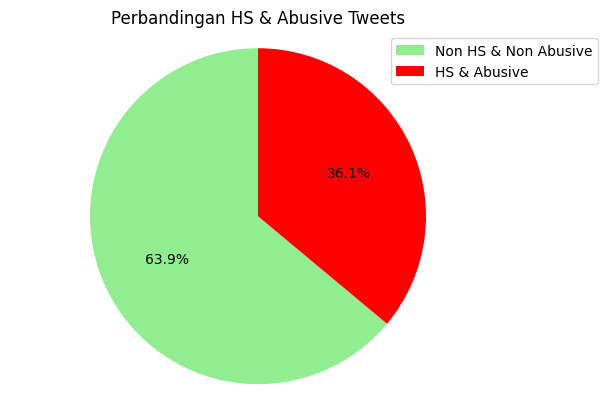

In [41]:
# Problem 1
non_hs_non_abusive = ((data['HS'] == 0) & (data['Abusive'] == 0)).sum()
hs_abusive = ((data['HS'] == 1) & (data['Abusive'] == 1)).sum()

# Membuat pie chart
labels = ['Non HS & Non Abusive', 'HS & Abusive']
sizes = [non_hs_non_abusive, hs_abusive]
colors = ['lightgreen', 'red']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan HS & Abusive Tweets')
plt.legend(loc='upper right', labels=labels, bbox_to_anchor=(1.2, 1))
plt.show()


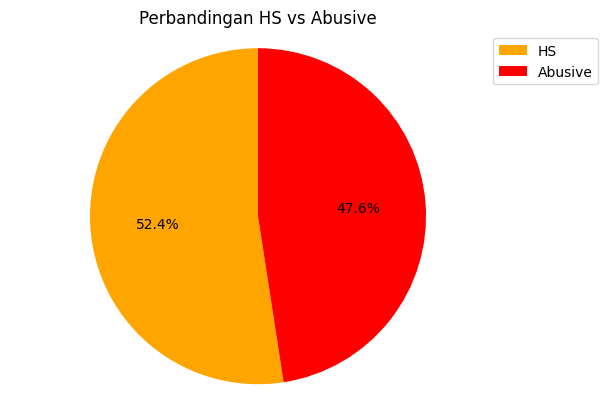

In [24]:
# Problem 2

abusive_count = (data['Abusive'] == 1).sum()
hs_count = (data['HS'] == 1).sum()

# Buat pie chart
labels = ['HS', 'Abusive']
sizes = [hs_count, abusive_count]
colors = ['orange', 'red']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Perbandingan HS vs Abusive')
plt.legend(loc='upper right', labels=labels, bbox_to_anchor=(1.2, 1))
plt.show()

In [25]:
data['HS_Individual'].value_counts()

HS_Individual
0    9504
1    3540
Name: count, dtype: int64

In [26]:
data['HS_Group'].value_counts()

HS_Group
0    11066
1     1978
Name: count, dtype: int64

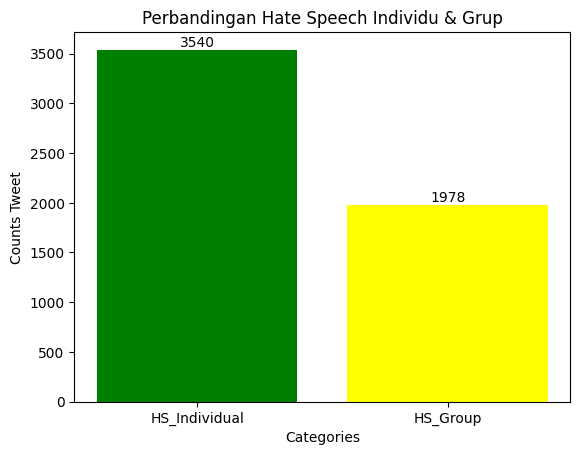

In [27]:
# Problem 3

hs_individu_count = (data['HS_Individual'] == 1).sum()
hs_group_count = (data['HS_Group'] == 1).sum()

labels = ['HS_Individual', 'HS_Group']
counts = [hs_individu_count, hs_group_count]
colors = ['green', 'yellow']

plt.bar(labels, counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Counts Tweet')
plt.title('Perbandingan Hate Speech Individu & Grup')

for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    
plt.show()

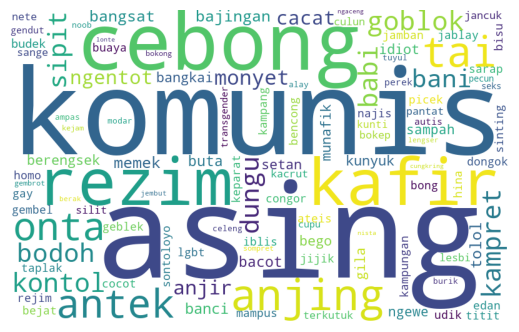

In [28]:
from wordcloud import WordCloud

# menggabungkan semua tweet dalam satu text
all_tweet = ' '.join(text for text in data['Tweet'])

# memisahkan text dengan list 
words = all_tweet.split()

# merubah kata-kata abusive menjadi list
abusive_word = abusive_df['ABUSIVE'].tolist()

# menghitung jumlah kemunculan kata abusive 
abusive_word_freq = {}
for word in words:
    if word.lower() in abusive_word:
        abusive_word_freq[word.lower()] = abusive_word_freq.get(word.lower(),0)+1

wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate_from_frequencies(abusive_word_freq)

plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [29]:
# Membuat DataFrame dari frekuensi kata-kata abusive
abusive_word_freq_df = pd.DataFrame(list(abusive_word_freq.items()), columns=['Abusive Word', 'Frequency'])

# Mengurutkan DataFrame berdasarkan frekuensi
abusive_word_freq_df = abusive_word_freq_df.sort_values(by='Frequency', ascending=False)

# Menampilkan 10 data abusive terbanyak
top_abusive_words = abusive_word_freq_df.head(10)
print(top_abusive_words)

   Abusive Word  Frequency
22        asing        700
20      komunis        680
3        cebong        512
40        rezim        357
4         kafir        353
17       anjing        277
58          tai        263
21        antek        234
14         onta        227
46       goblok        210


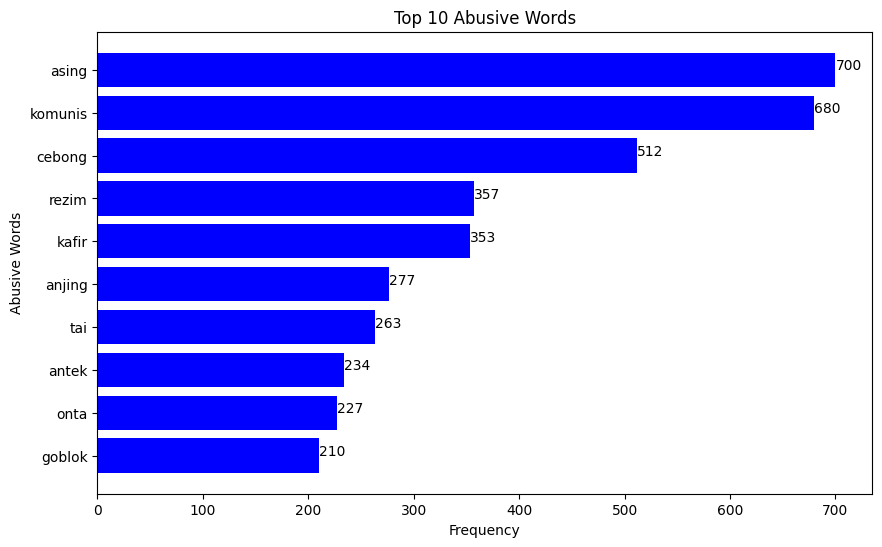

In [30]:
# Problem 4
words = top_abusive_words['Abusive Word']
freq = top_abusive_words['Frequency']

plt.figure(figsize=(10, 6))
plt.barh(words, freq, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Abusive Words')
plt.title('Top 10 Abusive Words')
plt.gca().invert_yaxis()
for i, value in enumerate(freq):
    plt.text(value, i, str(value))
plt.show()

In [31]:
data['total_char'] = data.Tweet.apply(len)

In [32]:
data['total_word'] = data.Tweet.apply(lambda sent: len(sent.split()))

In [33]:
df = data[['Tweet','total_char','total_word']]
df

,Tweet,total_char,total_word
0,di saat semua cowok berusaha melacak perhatian...,133,22
1,siapa yang telat memberi tau eluedan sarap aku...,105,18
2,empat puluh satu kadang aku berpikir kenapa ak...,264,40
3,aku itu aku ku tau matamu sipit tapi dilihat d...,62,13
4,kaum cebong kafir sudah kelihatan dongoknya da...,76,12
...,...,...,...
13164,jangan asal berbicara ndasmu congor kamu yang ...,63,10
13165,kasur mana enak kunyuk,22,4
13166,hati hati bisu tidak lagi bosan duh,35,7
13167,bom yang real mudah terdeteksi bom yang terkub...,114,18


In [34]:
jumlah_total_char = df['total_char'].sum()
print('Jumlah total character dalam kolom Tweet:', jumlah_total_char)

Jumlah total character dalam kolom Tweet: 1486025


In [35]:
jumlah_total_word = df['total_word'].sum()
print('Jumlah total kata dalam kolom Tweet:', jumlah_total_word)

Jumlah total kata dalam kolom Tweet: 231125


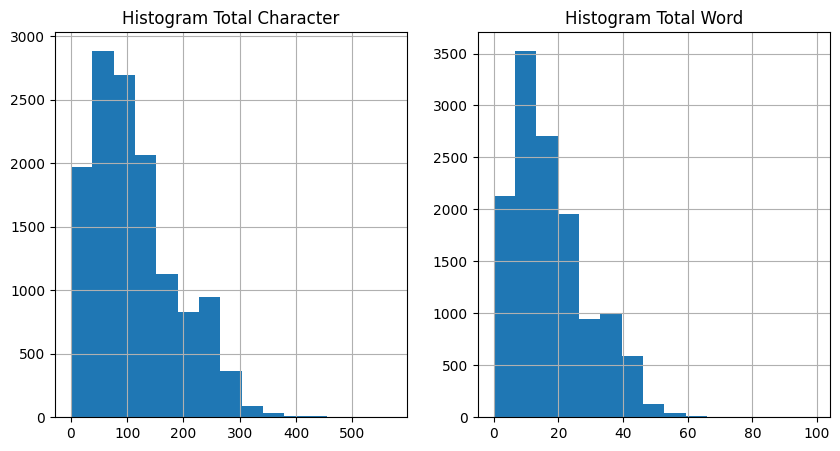

In [36]:
# Problem 5
fig, (his1, his2) = plt.subplots(1, 2, figsize=(10, 5))
his1.hist(df['total_char'], bins=15)
his1.set_title('Histogram Total Character')
his1.grid(True) 
his2.hist(df['total_word'], bins=15)
his2.set_title('Histogram Total Word')
his2.grid(True) 
plt.subplots_adjust(wspace=0.2)
plt.show()

In [37]:
data.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_char,total_word
count,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000,13044.000000
mean,0.423030,0.383701,0.271389,0.151641,0.060488,0.043162,0.024686,0.023306,0.284115,0.256670,0.130175,0.036185,113.924026,17.718875
std,0.494059,0.486305,0.444693,0.358686,0.238397,0.203229,0.155171,0.150879,0.451009,0.436812,0.336509,0.186758,75.667846,11.579923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,15.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,156.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,569.000000,99.000000


In [49]:
HS_Individual = data['HS_Individual'].mean()
HS_Group = data['HS_Group'].mean()
HS_Religion = data['HS_Religion'].mean()
HS_Race = data['HS_Race'].mean()
HS_Physical = data['HS_Physical'].mean()
HS_Gender = data['HS_Gender'].mean()
HS_Other = data['HS_Other'].mean()
HS_Weak = data['HS_Weak'].mean()
HS_Moderate = data['HS_Moderate'].mean()
HS_Strong = data['HS_Strong'].mean()

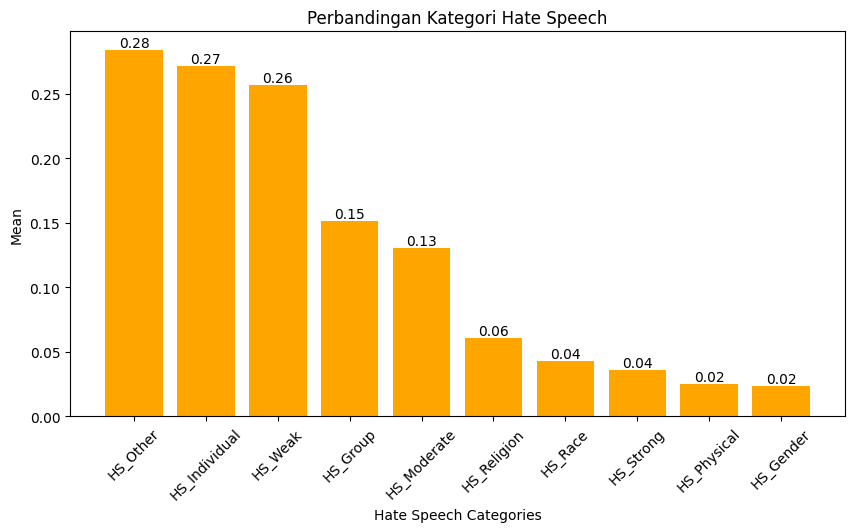

In [65]:
mean_HS = [HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong]

categories = [
    'HS_Individual',
    'HS_Group',
    'HS_Religion',
    'HS_Race',
    'HS_Physical',
    'HS_Gender',
    'HS_Other',
    'HS_Weak',
    'HS_Moderate',
    'HS_Strong'
]

sorted_mean_HS, sorted_categories = zip(*sorted(zip(mean_HS, categories), reverse=True))

plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_categories, sorted_mean_HS, color='orange')
plt.title('Perbandingan Kategori Hate Speech')
plt.xlabel('Hate Speech Categories')
plt.ylabel('Mean')
plt.xticks(rotation=45)

# Menambahkan angka di atas setiap bar
for bar, mean in zip(bars, sorted_mean_HS):
    plt.text(bar.get_x() + bar.get_width() / 2, mean, round(mean, 2), ha='center', va='bottom')

plt.show()

In [66]:
data['Tweet'].str.split()

0        [di, saat, semua, cowok, berusaha, melacak, pe...
1        [siapa, yang, telat, memberi, tau, eluedan, sa...
2        [empat, puluh, satu, kadang, aku, berpikir, ke...
3        [aku, itu, aku, ku, tau, matamu, sipit, tapi, ...
4        [kaum, cebong, kafir, sudah, kelihatan, dongok...
                               ...                        
13164    [jangan, asal, berbicara, ndasmu, congor, kamu...
13165                          [kasur, mana, enak, kunyuk]
13166          [hati, hati, bisu, tidak, lagi, bosan, duh]
13167    [bom, yang, real, mudah, terdeteksi, bom, yang...
13168    [mana, situ, memberi, itu, cuma, foto, ya, kut...
Name: Tweet, Length: 13044, dtype: object

In [68]:
df['Total_word'] = data['Tweet'].str.split(' ').map(len)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11492\3758558011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_word'] = data['Tweet'].str.split(' ').map(len)


,Tweet,total_char,total_word,Total_word
0,di saat semua cowok berusaha melacak perhatian...,133,22,22
1,siapa yang telat memberi tau eluedan sarap aku...,105,18,18
2,empat puluh satu kadang aku berpikir kenapa ak...,264,40,40
3,aku itu aku ku tau matamu sipit tapi dilihat d...,62,13,13
4,kaum cebong kafir sudah kelihatan dongoknya da...,76,12,12


<Axes: xlabel='Total_word', ylabel='Count'>

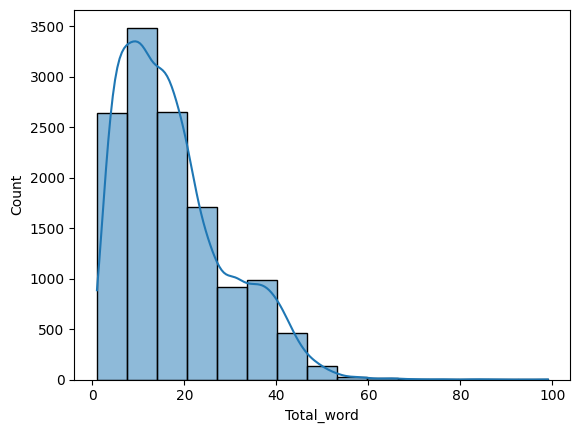

In [73]:
sns.histplot(df['Total_word'],bins=15, kde=True)

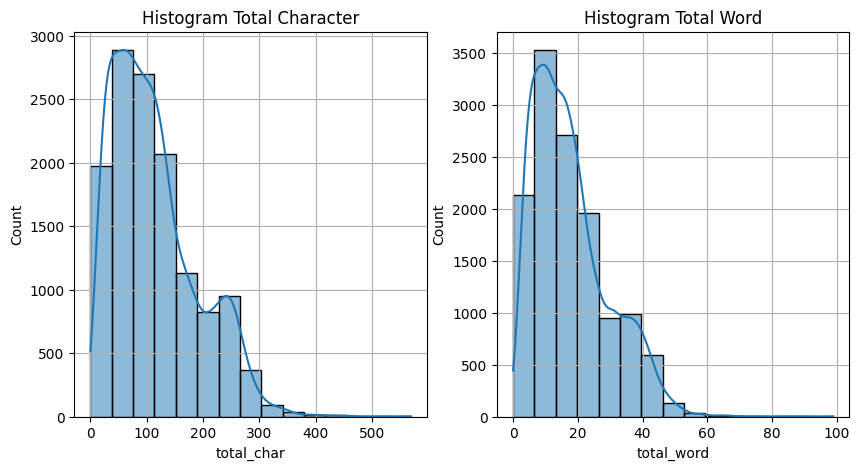

In [75]:
fig, (his1, his2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['total_char'], bins=15, kde=True, ax=his1)
his1.set_title('Histogram Total Character')
his1.grid(True) 

sns.histplot(df['total_word'], bins=15, kde=True, ax=his2)
his2.set_title('Histogram Total Word')
his2.grid(True) 

plt.subplots_adjust(wspace=0.2)
plt.show()

In [78]:
print('Skewness total word =',df['Total_word'].skew())
print('Skewness total char =',df['total_char'].skew())

Skewness total word = 0.9469706493179129
Skewness total char = 0.894125421238742
